# Demo: Single Qubit Rotations

## Imports + Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from bosonic_jax import Qubit, GKPQubit, execute, BosonicRegister, BosonicCircuit, PhaseRotationGate, \
                    DisplaceGate, CDGate, QubitRotationGate, NumDepQubitRotationGate
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

## Initialize Bosonic Circuit

In [3]:
# Circuit containing 1 cavity and 1 qubit
breg = BosonicRegister([GKPQubit({"N": 50}),Qubit()])
bcirc = BosonicCircuit(breg)

# Maximum Photon Number
N = 50

I_q = qt.qeye(2)
I_a = qt.qeye(N)

# Define some useful density matrices
ρ_qubit_g = qt.ket2dm(qt.basis(2, 0))
ρ_qubit_e = qt.ket2dm(qt.basis(2, 1))
ρ_cavity_vac = qt.coherent_dm(N, 0)

### Initialize $|{\rm vac}, g\rangle$

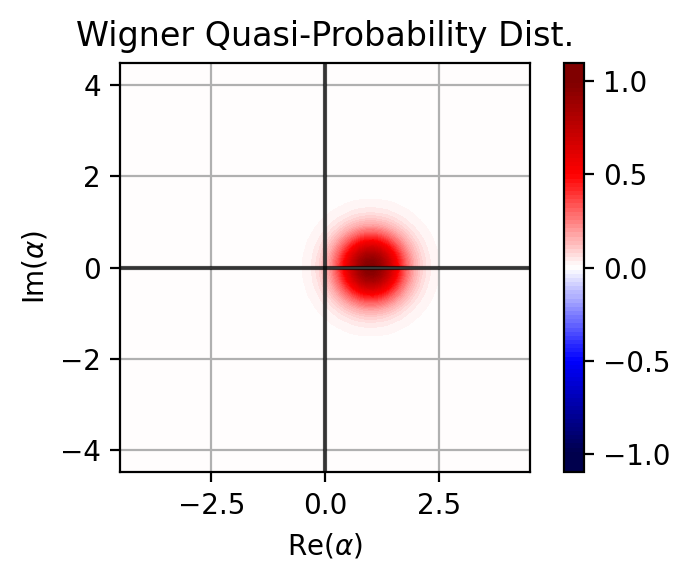

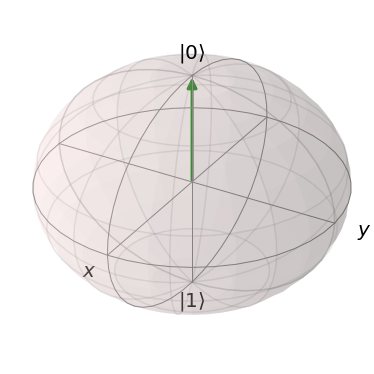

In [4]:
bcirc.state = qt.tensor(qt.coherent_dm(N, 1.0), ρ_qubit_g)

bcirc.plot(0)
bcirc.plot(1)

## Qubit Rotation: Unitary Simulation
Use `rot_axis = [ax, ay, az]` to define a Bloch vector [**a**] about which to rotate by an angle θrot. 

In [5]:
π = np.pi
θrot = π/2  # Qubit rotation angle in rads

params={"rot_axis": [0, 1, 0], "theta": θrot}

# Initialize, then add R(θ) gate to Qubit
bcirc.reset()
bcirc.add(QubitRotationGate, 1, params)

In [6]:
execute(bcirc, "unitary")

Quantum object: dims = [[50, 2], [1, 1]], shape = (100, 1), type = ket
Qobj data =
[[ 4.04495594e-01+0.00000000e+00j]
 [ 4.04495594e-01+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-2.18940749e-01+1.72408312e-03j]
 [-2.18940749e-01+1.72408312e-03j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 2.79687511e-01-8.17536804e-05j]
 [ 2.79687511e-01-8.17536804e-05j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 1.20594960e-01+4.81130899e-03j]
 [ 1.20594960e-01+4.81130899e-03j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 3.87795291e-01+4.31518465e-03j]
 [ 3.87795291e-01+4.31518465e-03j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-1.43447588e-02+9.37735589e-03j]
 [-1.43447588e-02+9.37735589e-03j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-7.72743918e-02-2.72103860e-03j]
 [-7.72743918e-02-2.72103860e-03j]
 [ 0.00

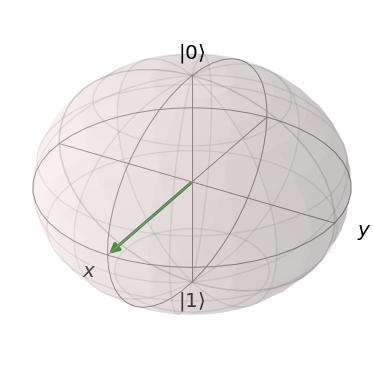

In [7]:
bcirc.plot(1)

## Qubit Rotation: Hamiltonian Simulation

In [8]:
π = np.pi
Ω = 2*π*10  # Qubit Drive Strength in 2π × MHz
θrot = π/2  # Qubit rotation angle in rads
ts = np.linspace(0.0, θrot / Ω, 101)

params={"omega": Ω, "rot_axis": [0, 1, 0]}

# Add R(θ) gate to Qubit
bcirc.reset()
bcirc.add(QubitRotationGate, 1, params, ts)

# Manually set bare system Hamiltonian H0 to 0 (interation pic.)
H0 = 0*qt.tensor(I_a, I_q)

In [9]:
execute(bcirc, "hamiltonian", H0=H0, c_ops=[], e_ops=[])

[Result object with sesolve data.
 --------------------------------
 states = True
 num_collapse = 0]

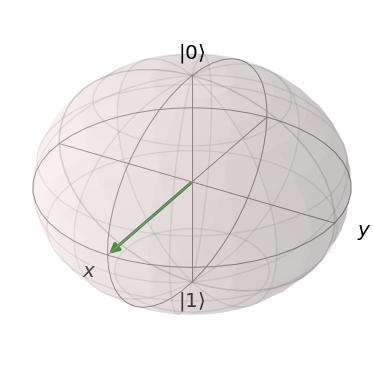

In [10]:
bcirc.plot(1)